## Opening and merging the data

In [132]:
import os
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#list all csv files
csv_files = glob.glob('*Sales*.{}'.format('csv'))
csv_files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [133]:
df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Data cleaning

In [134]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [135]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [136]:
df.dropna(axis=0, how='all', inplace=True)
df.shape

(186305, 6)

In [137]:
df.columns = ['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address']

In [138]:
df.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [139]:
df.astype({'Price_Each':'float64', 'Order_Date': 'datetime'})

ValueError: could not convert string to float: 'Price Each'

In [140]:
df['Price_Each'].str.contains('Price Each').sum()

355

In [141]:
df = df[~df['Price_Each'].str.contains('Price Each')]

In [142]:
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [143]:
df = df.astype({'Order_ID':'int64','Quantity_Ordered':'int64','Price_Each':'float64', 'Order_Date': 'datetime64'})
df.dtypes

Order_ID                     int64
Product                     object
Quantity_Ordered             int64
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
dtype: object

## Data modification

In [144]:
df['Order_Month'] = df['Order_Date'].dt.month_name()

In [145]:
df['Order_Day'] = df['Order_Date'].dt.day_name()

In [146]:
df['Order_Hour'] = df['Order_Date'].dt.hour

In [147]:
df['Sales'] = df['Quantity_Ordered'] * df['Price_Each']

In [148]:
df['City'] = (df['Purchase_Address'].str.split(',')).str.get(1)

In [149]:
df['State'] = (df['Purchase_Address'].str.split(',')).str.get(2).str[1:3]

In [150]:
#Change column order
new_columns=['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Sales', 'Order_Date', 'Order_Month', 'Order_Day', 'Order_Hour',\
             'Purchase_Address', 'City', 'State']
df = df[new_columns]

In [155]:
df.reset_index(drop=True, inplace=True)
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Sales,Order_Date,Order_Month,Order_Day,Order_Hour,Purchase_Address,City,State
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,April,Friday,8,"917 1st St, Dallas, TX 75001",Dallas,TX
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,April,Sunday,22,"682 Chestnut St, Boston, MA 02215",Boston,MA
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,April,Friday,14,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,April,Friday,14,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,April,Tuesday,9,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,September,Tuesday,20,"840 Highland St, Los Angeles, CA 90001",Los Angeles,CA
185946,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,September,Sunday,16,"216 Dogwood St, San Francisco, CA 94016",San Francisco,CA
185947,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,September,Monday,7,"220 12th St, San Francisco, CA 94016",San Francisco,CA
185948,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,September,Thursday,17,"511 Forest St, San Francisco, CA 94016",San Francisco,CA


## Data visualization

### Question 1: In which Month was the most sales?

In [156]:
sales_by_month = df.groupby(df['Order_Month'])['Sales'].sum()

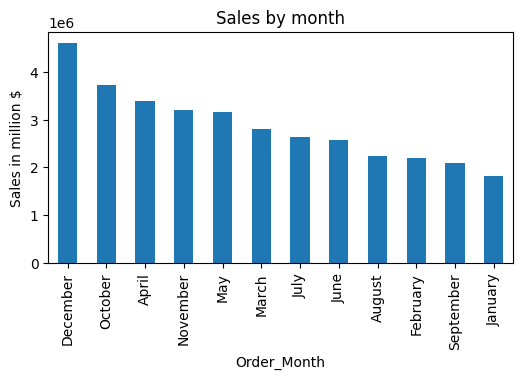

In [157]:
sales_by_month.sort_values(ascending=False).plot(kind='bar', figsize = (6,3), title = 'Sales by month').set_ylabel('Sales in million $')
plt.show()

#### Answer 1: December and October had the largest sales numbers, followed by April.

### Question 2: In which day was the most sales?

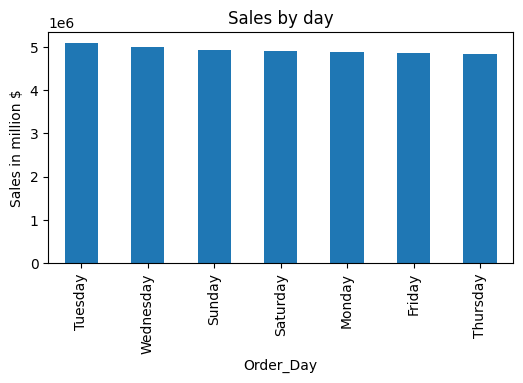

In [158]:
sales_by_day = df.groupby(df['Order_Day'])['Sales'].sum()

sales_by_day.sort_values(ascending=False).plot(kind='bar', figsize = (6,3), title = 'Sales by day').set_ylabel('Sales in million $')
plt.show()

#### Answer 2: Sales have been pretty equally distributed throughout the week, but Tuesday, Wednesday and Sunday had the most.

### Question 3: Which city had the most sales?

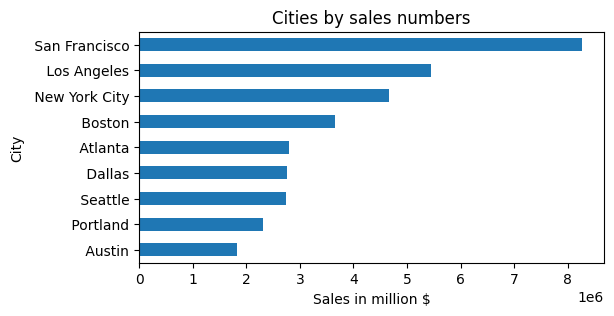

In [159]:
city_sales = df.groupby(df['City'])['Sales'].sum()

city_sales.sort_values(ascending=True).plot(kind='barh', figsize = (6,3), title = 'Cities by sales numbers').set_xlabel('Sales in million $')
plt.show()

#### Answer 3: San Fransisco had the most sales by a lot (more than 8 million dollars in 2019), Los Angeles came in second and New York City as third.

### Question 4: At what time should we display advertisements during the day to maximize profits?

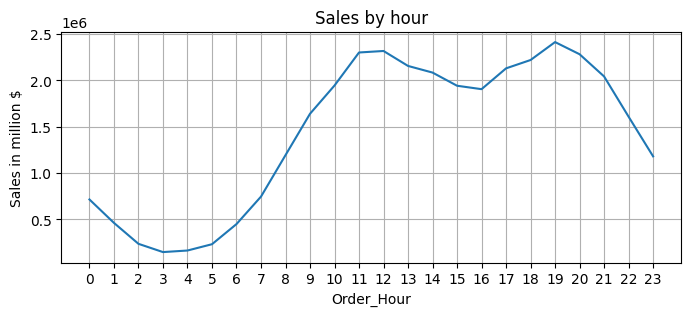

In [160]:
sales_by_hour = df.groupby(df['Order_Hour'])['Sales'].sum()

sales_by_hour.plot(kind='line', figsize = (8,3), title = 'Sales by hour').set_ylabel('Sales in million $')
plt.xticks(np.arange(24))
plt.grid()
plt.show()

#### Answer 4: Since sales peak at 12 and 19 hours during the day, I would recommend putting out the advertisements just before these periods, around 10 am and 6 pm. 

### Question 5: What products are usually sold together?

In [162]:
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Sales,Order_Date,Order_Month,Order_Day,Order_Hour,Purchase_Address,City,State
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,April,Friday,8,"917 1st St, Dallas, TX 75001",Dallas,TX
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,April,Sunday,22,"682 Chestnut St, Boston, MA 02215",Boston,MA
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,April,Friday,14,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,April,Friday,14,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,April,Tuesday,9,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,September,Tuesday,20,"840 Highland St, Los Angeles, CA 90001",Los Angeles,CA
185946,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,September,Sunday,16,"216 Dogwood St, San Francisco, CA 94016",San Francisco,CA
185947,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,September,Monday,7,"220 12th St, San Francisco, CA 94016",San Francisco,CA
185948,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,September,Thursday,17,"511 Forest St, San Francisco, CA 94016",San Francisco,CA


In [165]:
duplicated_IDs = df[df['Order_ID'].duplicated(keep=False)]

In [166]:
duplicated_IDs

,Order_ID,Product,Quantity_Ordered,Price_Each,Sales,Order_Date,Order_Month,Order_Day,Order_Hour,Purchase_Address,City,State
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,April,Friday,14,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,April,Friday,14,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
17,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,April,Wednesday,19,"20 Hill St, Los Angeles, CA 90001",Los Angeles,CA
18,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,April,Wednesday,19,"20 Hill St, Los Angeles, CA 90001",Los Angeles,CA
29,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,April,Sunday,11,"823 Highland St, Boston, MA 02215",Boston,MA
...,...,...,...,...,...,...,...,...,...,...,...,...
185893,259303,AA Batteries (4-pack),1,3.84,3.84,2019-09-20 20:18:00,September,Friday,20,"106 7th St, Atlanta, GA 30301",Atlanta,GA
185904,259314,Wired Headphones,1,11.99,11.99,2019-09-16 00:25:00,September,Monday,0,"241 Highland St, Atlanta, GA 30301",Atlanta,GA
185905,259314,AAA Batteries (4-pack),2,2.99,5.98,2019-09-16 00:25:00,September,Monday,0,"241 Highland St, Atlanta, GA 30301",Atlanta,GA
185941,259350,Google Phone,1,600.00,600.00,2019-09-30 13:49:00,September,Monday,13,"519 Maple St, San Francisco, CA 94016",San Francisco,CA


In [175]:
duplicated_IDs['Group_orders'] = duplicated_IDs.groupby('Order_ID')['Product'].transform(lambda x: ', '.join(x))

C:\Users\Pap Benedek\AppData\Local\Temp\ipykernel_21740\541979791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_IDs['Group_orders'] = duplicated_IDs.groupby('Order_ID')['Product'].transform(lambda x: ', '.join(x))


In [176]:
sold_together = duplicated_IDs.drop_duplicates(subset=['Order_ID'])
sold_together[['Order_ID', 'Group_orders']]

,Order_ID,Group_orders
2,176560,"Google Phone, Wired Headphones"
17,176574,"Google Phone, USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176586,"AAA Batteries (4-pack), Google Phone"
118,176672,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...
185882,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
185884,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
185892,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
185904,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [178]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in sold_together['Group_orders']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


#### Answer 5: Phones and charging cables are the products most frequently sold together.

### Question 6: What is the most popular product?

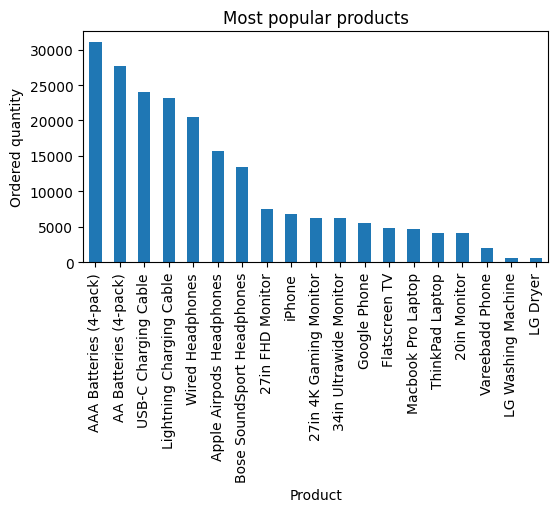

In [183]:
most_popular_product = df.groupby(df['Product'])['Quantity_Ordered'].sum()

most_popular_product.sort_values(ascending=False).plot(kind='bar', figsize = (6,3), title = 'Most popular products').set_ylabel('Ordered quantity')
plt.show()

#### Asnwer 6: AAA Batteries (4-pack) is the most popular product, with more than 30000 units sold, AA Batteries in second, and the USB-C Charging Cable is the third.

### Question 7: How does the products popularity align with the products price?

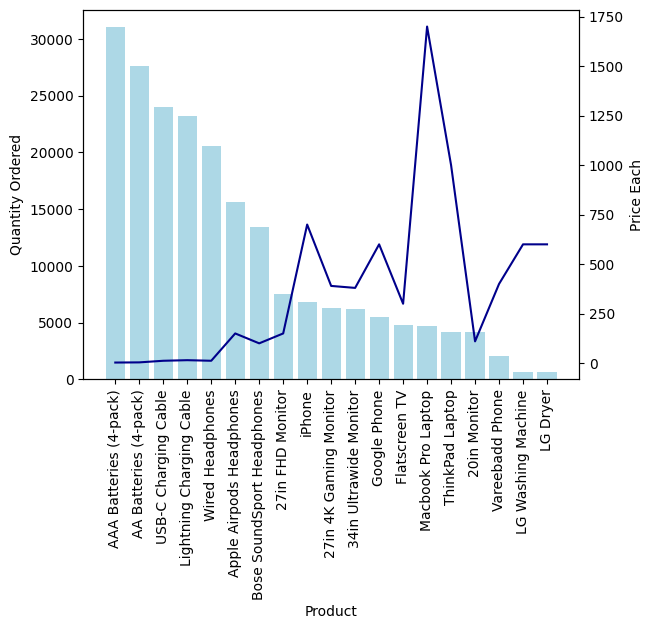

In [244]:
fig, ax1 = plt.subplots()

most_popular_product = df.groupby(df['Product'])['Quantity_Ordered'].sum().sort_values(ascending=False)

ax1.bar(most_popular_product.index, most_popular_product.values, color='#ADD8E6')
ax1.set_ylabel('Quantity Ordered')

# Create a second y-axis
ax2 = ax1.twinx()

product_price = df.groupby(df['Product'])['Price_Each'].mean()
# Get the corresponding order of product_price based on the order of most_popular_product
product_price_ordered = product_price.reindex(most_popular_product.index)

# Plot the second dataframe on the second y-axis
ax2.plot(product_price_ordered.index, product_price_ordered.values, color='#00008B')
ax2.set_ylabel('Price Each')

ax1.set_xlabel('Product')
ax1.set_xticks(range(len(most_popular_product.index)))
ax1.set_xticklabels(most_popular_product.index, rotation=90)

plt.show()


#### Answer 7: Based on the shown data, it can be said, that basically the more cheaper the product, the more quantity is ordered. Of course there are some examples: for example the Macbook Pro Laptop is by far the most expensive product, but its not the least sold item. The 20 inch monitor is also a good example, because altough its price tag is quite small (relative to the other products), its almost the least popular item. So there are some outliers, but the basic trend is valid.